In [34]:
import lightkurve as lk
import matplotlib.pyplot as plt


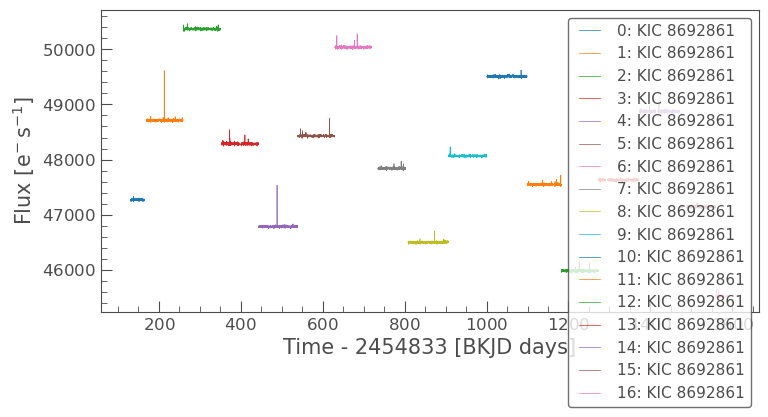

In [16]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-69', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [17]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr008692861,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr008692861,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr008692861,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr008692861,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr008692861,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr008692861,0.0
...,...,...,...,...,...,...
10,Kepler Quarter 11,2012,Kepler,1800,kplr008692861,0.0
11,Kepler Quarter 12,2012,Kepler,1800,kplr008692861,0.0


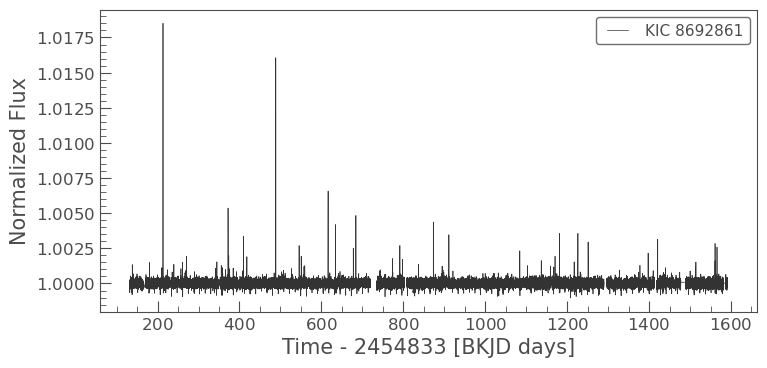

In [18]:
lc = lc_collection.stitch()
lc2 = lc.flatten(window_length=901)

lc2.plot();

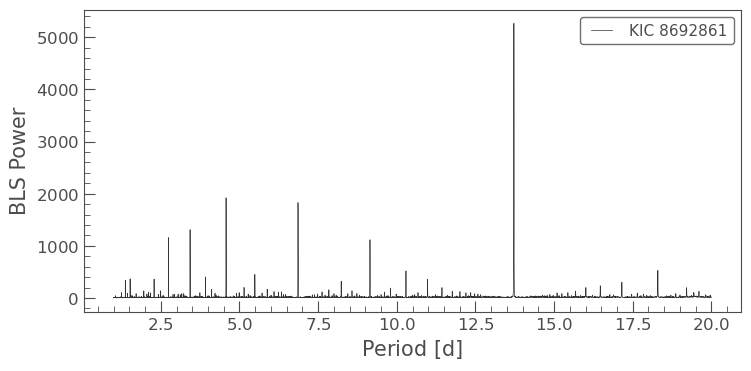

In [19]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [20]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_period = planet_b_period

<Quantity 13.72177218 d>

(0.999, 1.002)

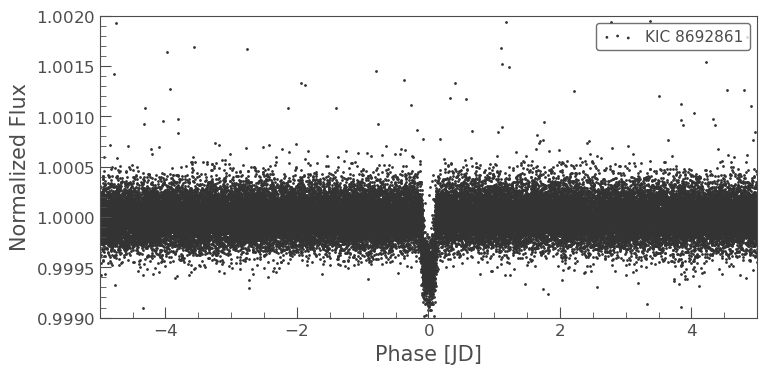

In [21]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);
ax.set_ylim(0.999, 1.002)

In [22]:
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

(0.995, 1.0025)

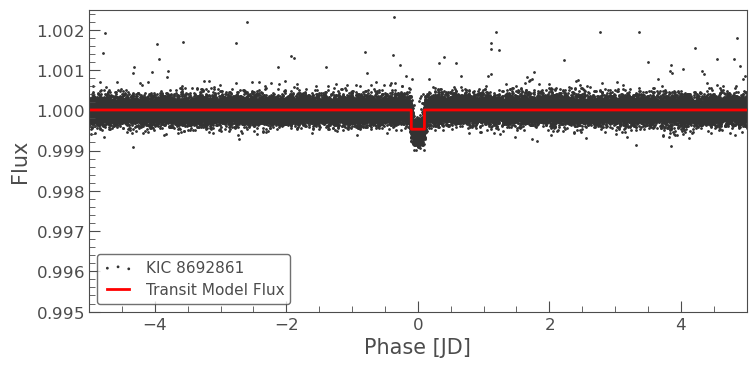

In [23]:
"""The code below generates the tranit graph"""
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);
ax.set_ylim(0.995, 1.0025)

In [45]:
df = planet_b_model.fold(planet_b_period, planet_b_t0)
df
df2 = lc.fold(planet_b_period, planet_b_t0)

In [48]:
"These blocks determine the size"
import scipy as sp
#lc.interact_bls()
#plt.plot(df["TimeDelta"], df["float64"])
time = []
for i in df["time"]:
    time.append(i)
fluxMod = []
for i in df["flux"]:
    fluxMod.append(i)
fluxMod2 = []
for j in df2["flux"]:
    fluxMod2.append(j)
ratio = 1 - min(fluxMod2)

starsize = 1.28539*69634e4
planetsize = starsize*sp.sqrt(ratio)
planetSize_inEarth = planetsize/6371000
print("The size of the planet is", planetSize_inEarth, "earth radii")


The size of the planet is 4.417726349785273 earth radii


/var/folders/vy/fstp4tbs7dd88v7rpr4cj9z00000gp/T/ipykernel_978/45468282.py:16: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  planetsize = starsize*sp.sqrt(ratio)


In [ ]:
"""The function for the habitable zone"""
def HabitableZone(Lum, OP, StarMass):
    #Calculation of SemiMajorAx
    Lum = Lum*3.827e26
    StarMass = StarMass*1.98e30
    OP = OP*3600*24
    G = 6.67e-11
    sigma = 5.67e-8
    res = OP*OP*G*StarMass/(4*sp.pi*sp.pi)
    PlanetOR = pow(res, 1/3)/(1.49e11)
    
    #Calculation of HZ Range:
    ROuter = sp.sqrt(Lum/(sigma*pow(275, 4)*4*sp.pi*sp.pi))/(1.49e11)
    RInner = sp.sqrt(Lum/(sigma*pow(375, 4)*4*sp.pi*sp.pi))/(1.49e11)
    
    inHz = False
    if(RInner <= PlanetOR <= ROuter):
        inHz = True
    else:
        inHz = False 
    print("The HZ zone is from", RInner, "AU to", ROuter, "AU.")
    print("Planet in HZ zone is", inHz, "The planet's OR is", PlanetOR)
"""We need manually look for stars and give the orbital period, mass of the star, and luminosity"""